# 🏋🏽‍♀️ Bagging vs Random Forest
How does Random Forest improve on Bagging?
The goal of this exercise is to investigate the correlation between randomly selected trees from Bagging and Random Forest. 

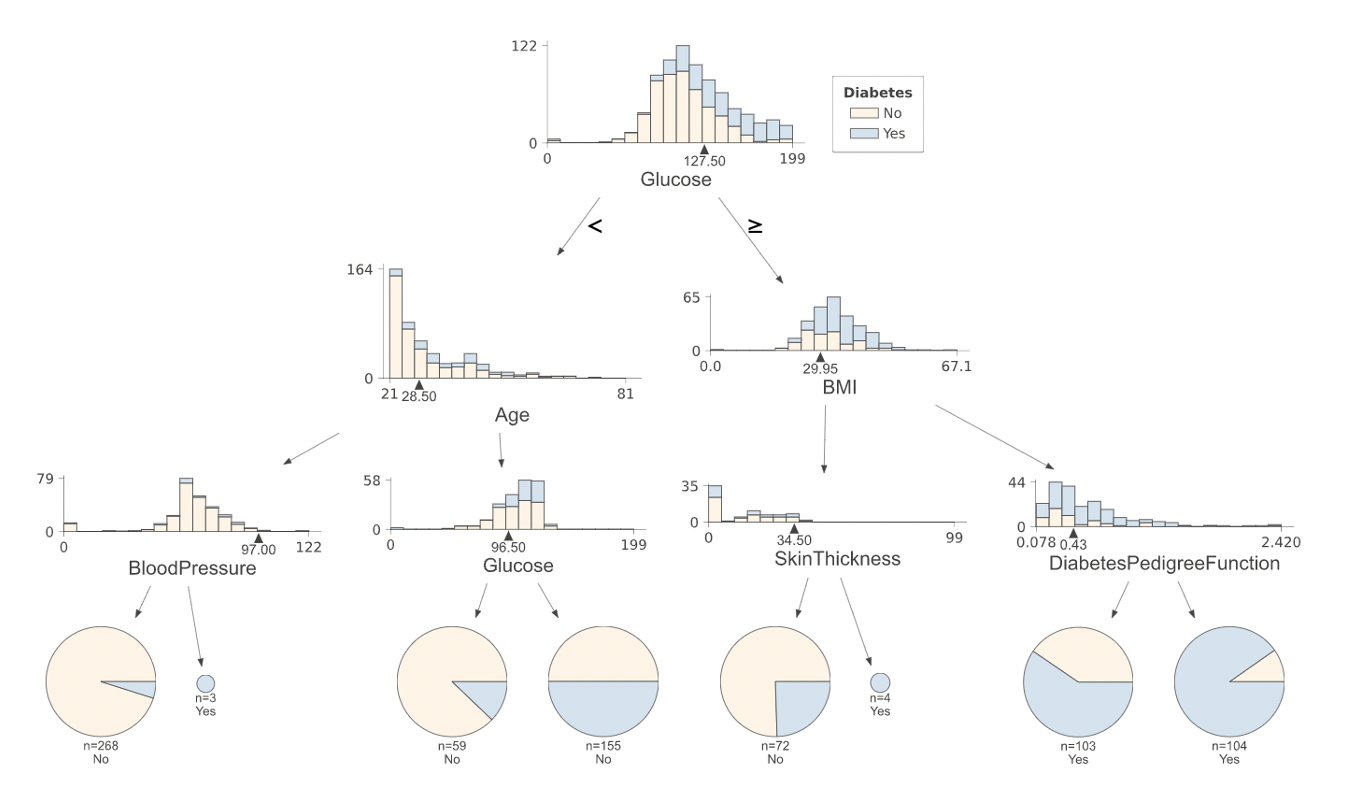

## Instructions:
- Read the dataset diabetes.csv as a pandas data-frame, and take a quick look at the data.

- Split the data into train and validation sets.

- Define a BaggingClassifier model that uses DecisionTreClassifier as its base estimator.

- Specify the number of bootstraps as 1000 and a maximum depth of 20.

- Fit the BaggingClassifier model on the train data.

- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given below.

- Predict on the test data using the first estimator and the mean model.

- Compute and display the validation accuracy

- Repeat the modeling and classification process above, this time using a RandomForestClassifier.

In [56]:
#!pip install -qq dtreeviz
import os, sys
sys.path.append(f"{os.getcwd()}/../")

In [57]:
# Import the main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtreeviz
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


%matplotlib inline

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [58]:
# Read the dataset and take a quick look
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
### edTest(test_assign) ###
# Assign the predictor and response variables. 
# "Outcome" is the response and all the other columns are the predictors
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values


In [88]:
# Fix a random_state
random_state = 30

# Split the data into train and validation sets with 80% train size
# and the above set random state
X_train, X_val, y_train,y_val = train_test_split(X, y, test_size=0.8, random_state=random_state)


## Bagging Implementation

In [89]:
# Define a Bagging classifier with randon_state as above
# and with a DecisionClassifier as a basemodel
# Fix the max_depth variable to 20 for all trees
max_depth = 20

# Set the 1000 estimators
n_estimators = 1000

# Initialize the Decision Tree classsifier with the set max depth and 
# random state
basemodel = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Initialize a Bagging classsifier with the Decision Tree as the base and 
# estimator and the number of estimator defined above
bagging = BaggingClassifier(estimator=basemodel, n_estimators=n_estimators, random_state=random_state)

# Fit the Bagging model on the training set
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=30),
                  n_estimators=1000, random_state=30)

In [90]:
### edTest(test_bagging) ###

# Use the trained model to predict on the validation data
predictions = bagging.predict(X_val)

# Compute the accuracy on the validation set
acc_bag = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Bagging, the accuracy on the validation set is {acc_bag}')


For Bagging, the accuracy on the validation set is 0.77


## Random Forest implementation

In [63]:
# Define a Random Forest classifier with random_state as defined above
#  and set the maximum depth to be max_depth and use 1000 estimators
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model on the training set
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)

In [64]:
### edTest(test_RF) ###

# Use the trained Random Forest model to predict on the validation data
predictions = random_forest.predict(X_val)

# Compute the accuracy on the validation set
acc_rf = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Random Forest, the accuracy on the validation set is {acc_rf}')


For Random Forest, the accuracy on the validation set is 0.75


## Visualizing the trees - Bagging

In [65]:
# Helper code to visualize the Bagging tree
# Reduce the max_depth for better visualization 
max_depth = 3

basemodel = DecisionTreeClassifier(max_depth=max_depth, 
                                random_state=random_state)

bagging = BaggingClassifier(estimator=basemodel, 
                                n_estimators=1000)

# Fit the model on the training set
bagging.fit(X_train, y_train)

# Selecting two trees at random
bagvati1 = bagging.estimators_[0]
bagvati2 = bagging.estimators_[100]


In [66]:
vizA = dtreeviz.model(bagvati1, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes'],
               )

viz_params = {'fontname': 'monospace',
              'label_fontsize': 18,
              'ticks_fontsize': 16,
              'scale': 1.4}

vizA.view(**viz_params);

In [67]:
vizB = dtreeviz.model(bagvati2, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
               )
vizB.view(**viz_params);

## Visualizing the trees - Random Forest

In [68]:
# Helper code to visualize the Random Forest tree

# Reduce the max_depth for visualization 
max_depth = 3
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Selecting two trees at random
forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]


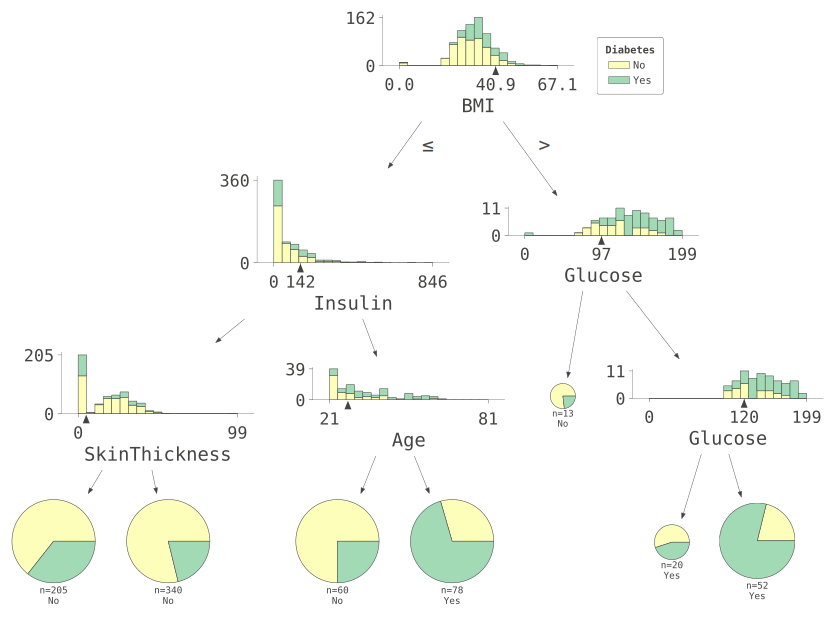

In [69]:
vizC = dtreeviz.model(forestvati1, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
               )
vizC.view(**viz_params)

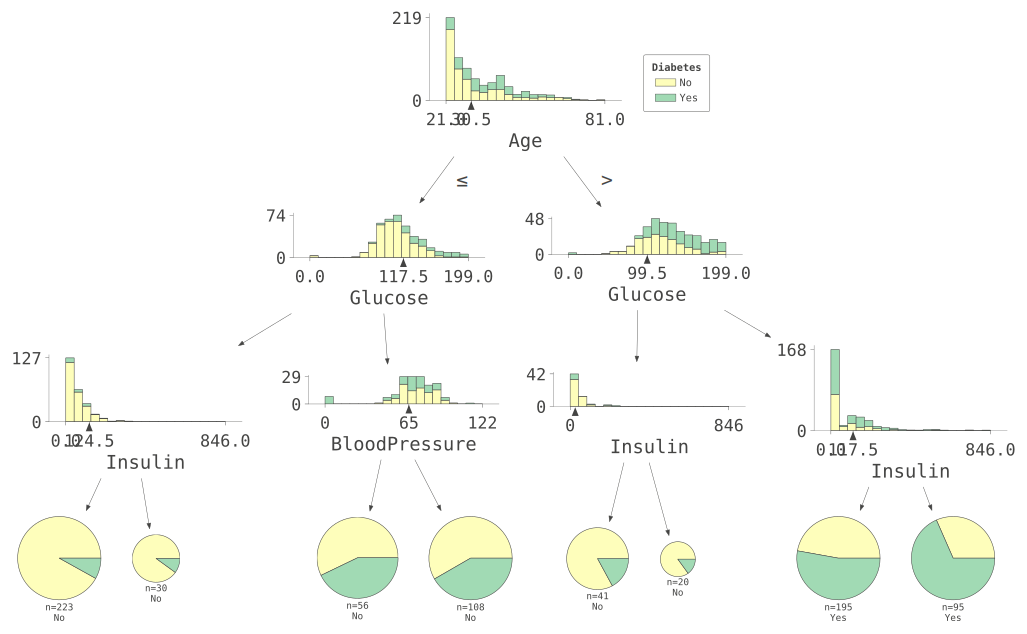

In [70]:
vizD = dtreeviz.model(forestvati2, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
               )
vizD.view(**viz_params)